# Predict Bike Sharing Demand with AutoGluon Template

### Install packages

In [2]:
!pip install -U pip
#!pip install -U setuptools wheel
!pip install -U "setuptools==59.5.0" wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir

  Using cached setuptools-59.5.0-py3-none-any.whl.metadata (5.0 kB)
Using cached setuptools-59.5.0-py3-none-any.whl (952 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 60.2.0
    Uninstalling setuptools-60.2.0:
      Successfully uninstalled setuptools-60.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
arviz 0.15.1 requires setuptools>=60.0.0, but you have setuptools 59.5.0 which is incompatible.
cvxpy 1.3.4 requires setuptools>65.5.1, but you have setuptools 59.5.0 which is incompatible.
openxlab 0.0.38 requires setuptools~=60.2.0, but you have setuptools 59.5.0 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.1/953.1 kB 11.3 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.5.0
    Uninstalling setuptools-59.5.0:
      Successfully uninstalled setuptools-59.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
cvxpy 1.3.4 requires setuptools>65.5.1, but you have setuptools 60.2.0 which is incompatible.


### 1.Loading the Dataset

### Setup Kaggle API Key

In [3]:
# create the kaggle directory
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "potatoindisguise"
kaggle_key = "62c1bcbfb0140db38b35b20807a9264d"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

In [1]:
!pip install kaggle --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 kB 994.0 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.12-py3-none-any.whl size=102969 sha256=fe6721045877233976dfe3fc5ef4b15eaeb43593bc7cfe44dc1103ca887bfd26
  Stored in directory: /root/.cache/pip/wheels/1e/0b/7c/50f8e89c3d2f82838dbd7afeddffbb9357003009ada98216c7
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.16
    Uninstalling kaggle-1.5.16:
      Successfully uninstalled kaggle-1.5.16


In [5]:
!kaggle competitions download -c bike-sharing-demand

!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 54.5MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


### Download and explore dataset

In [5]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [6]:
train = pd.read_csv('train.csv', parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
# statistical features
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [8]:
test = pd.read_csv('test.csv', parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [9]:
# similar to train and test dataset
submission = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Model Training With AutoGluon

We want to predict the count, which is our target label. We won't consider the casual and registered columns since they're not available in the test dataset. We'll evaluate the model using root mean squared error (RMSE). There's a time constraint of 10 minutes (600 seconds). We'll prioritize creating the highest quality model by using the preset best_quality.

In [10]:
predictor = TabularPredictor(label="count",
                             problem_type="regression",
                             eval_metric="root_mean_squared_error",
                             learner_kwargs={"ignored_columns": ["casual", "registered"]}).fit(
    train_data=train,
    time_limit=600,
    presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20240427_184300"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240427_184300/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 200 seconds

###  A comparison for the models

In [11]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.076807  root_mean_squared_error      22.511817  368.555415                0.001033           0.042007            3       True         13
1   RandomForestMSE_BAG_L2  -53.393466  root_mean_squared_error      18.631737  270.526047                0.627494          25.475595            2       True         11
2          LightGBM_BAG_L2  -55.014601  root_mean_squared_error      18.334023  267.183479                0.329780          22.133027            2       True         10
3          CatBoost_BAG_L2  -55.827951  root_mean_squared_error      18.171808  279.791555                0.167565          34.741103            2       True         12
4        LightGBMXT_BAG_L2  -60.393663  root_mean_squared_error      21.385945  286.163684   

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -130.78715833634067,
  'ExtraTree

### Making predictions from test dataset

In [12]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [13]:
predictions = predictor.predict(test)
predictions.head()

0    23.855446
1    42.494186
2    45.717438
3    48.965355
4    52.168850
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [14]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.676476
std        90.057404
min         2.983506
25%        19.922369
50%        64.065002
75%       168.212799
max       367.726959
Name: count, dtype: float64

In [15]:
# find out no. of negative values
sum(predictions[predictions < 0])

0

In [16]:
# Set them to zero if they are
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [17]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [27]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:01<00:00, 145kB/s]  
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [28]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description              status    publicScore  privateScore  
---------------------------  -------------------  -----------------------  --------  -----------  ------------  
submission.csv               2024-04-27 18:58:16  first raw submission     complete  1.802        1.802         
submission.csv               2024-04-27 18:57:33  my first raw submission  complete  1.802        1.802         
submission.csv               2024-04-27 18:54:28  my first raw submission  complete  1.802        1.802         


#### Initial score of `1.802`

### Feature Creation and Data Analysis

## EDA and Creating an additional feature
* For Exploratory Data Analysis (EDA) and feature engineering, we'll extract additional information from the datetime column. Specifically, we'll separate it into hour, day, and month parts. This will allow us to explore hourly, daily, and seasonal patterns in bike rentals, enhancing our understanding of the data and potentially improving the predictive performance of our model.








In [29]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


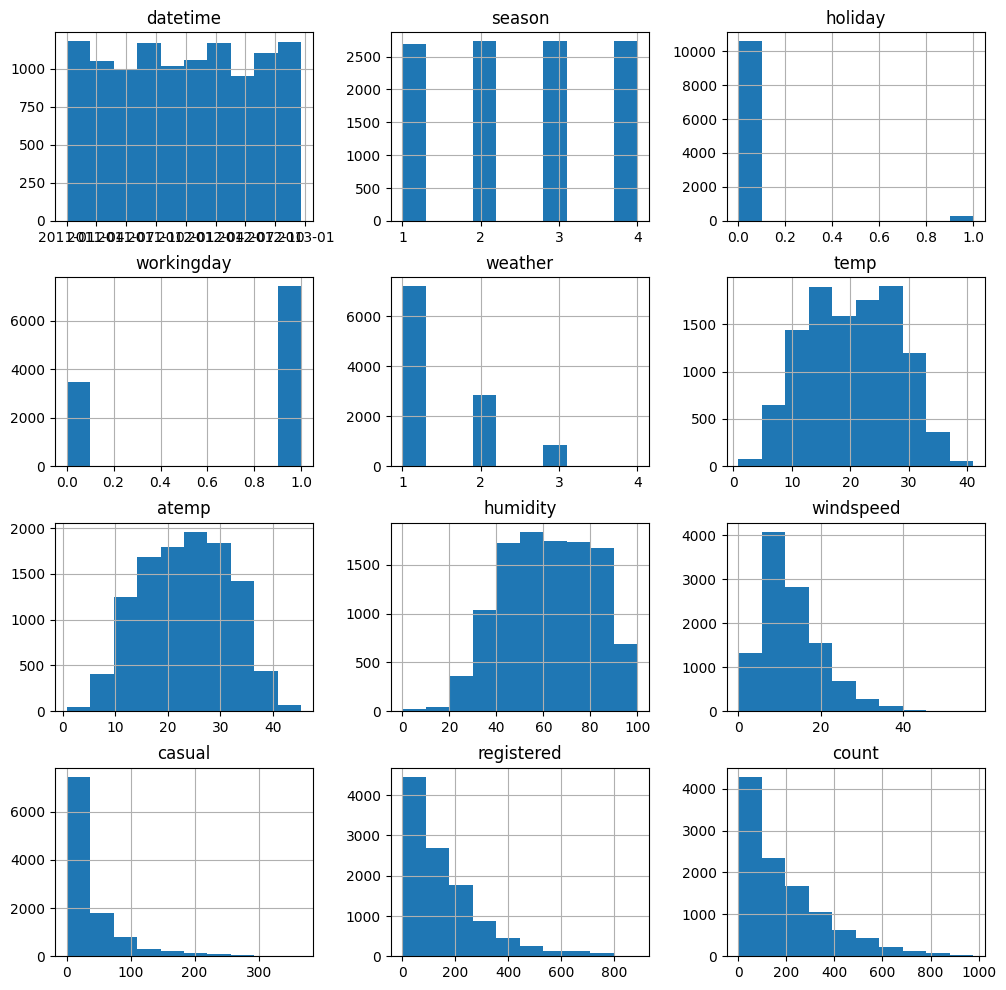

In [30]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
%matplotlib inline
train.hist(figsize=(12,12));

In [31]:
test.datetime.dt.day.values.reshape((-1, 1))

array([[20],
       [20],
       [20],
       ...,
       [31],
       [31],
       [31]], dtype=int32)

In [32]:
# new feature
feature_list = ['year', 'month', 'day', 'hr']
train['year'] = train.datetime.dt.year
train['month'] = train.datetime.dt.month
train['day'] = train.datetime.dt.day
train['hr'] = train.datetime.dt.hour

test['year'] = test.datetime.dt.year
test['month'] = test.datetime.dt.month
test['day'] = test.datetime.dt.day
test['hr'] = test.datetime.dt.hour

## converting these features to category types
* To ensure that the models recognize these features as categories rather than just numerical values, we'll assign them category types. By setting the data type to category, AutoGluon will correctly interpret them as categorical variables. This ensures that the models treat the hour, day, and month parts as discrete categories rather than continuous numerical values during training and prediction.

In [33]:
set(train.season), set(train.weather)

({1, 2, 3, 4}, {1, 2, 3, 4})

In [34]:
train.season.unique()

array([1, 2, 3, 4])

In [35]:
season_keys = train.season.unique()
season_vals = ['spring', 'summer', 'fall', 'winter']
season_dict = dict(zip(season_keys, season_vals))
season_dict

{1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}

In [36]:
def column_dict(df, column, vals):
    df_keys = df[column].unique()
    df_dict = dict(zip(df_keys, vals))
    df[column] = df[column].map(df_dict)
    return df[column]

In [37]:
train["season"] = column_dict(train, 'season', ['spring', 'summer', 'fall', 'winter'])
train["weather"] = column_dict(train, 'weather', ['Clear, Few clouds, Partly cloudy, Partly cloudy',
                               'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                               'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
                               'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog '])
test["season"] = column_dict(test, 'season', ['spring', 'summer', 'fall', 'winter'])
test["weather"] = column_dict(test, 'weather', ['Clear, Few clouds, Partly cloudy, Partly cloudy',
                               'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                               'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
                               'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog '])

In [38]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hr
0,2011-01-01 00:00:00,spring,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,spring,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,spring,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,spring,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,spring,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,75,0.0,0,1,1,2011,1,1,4


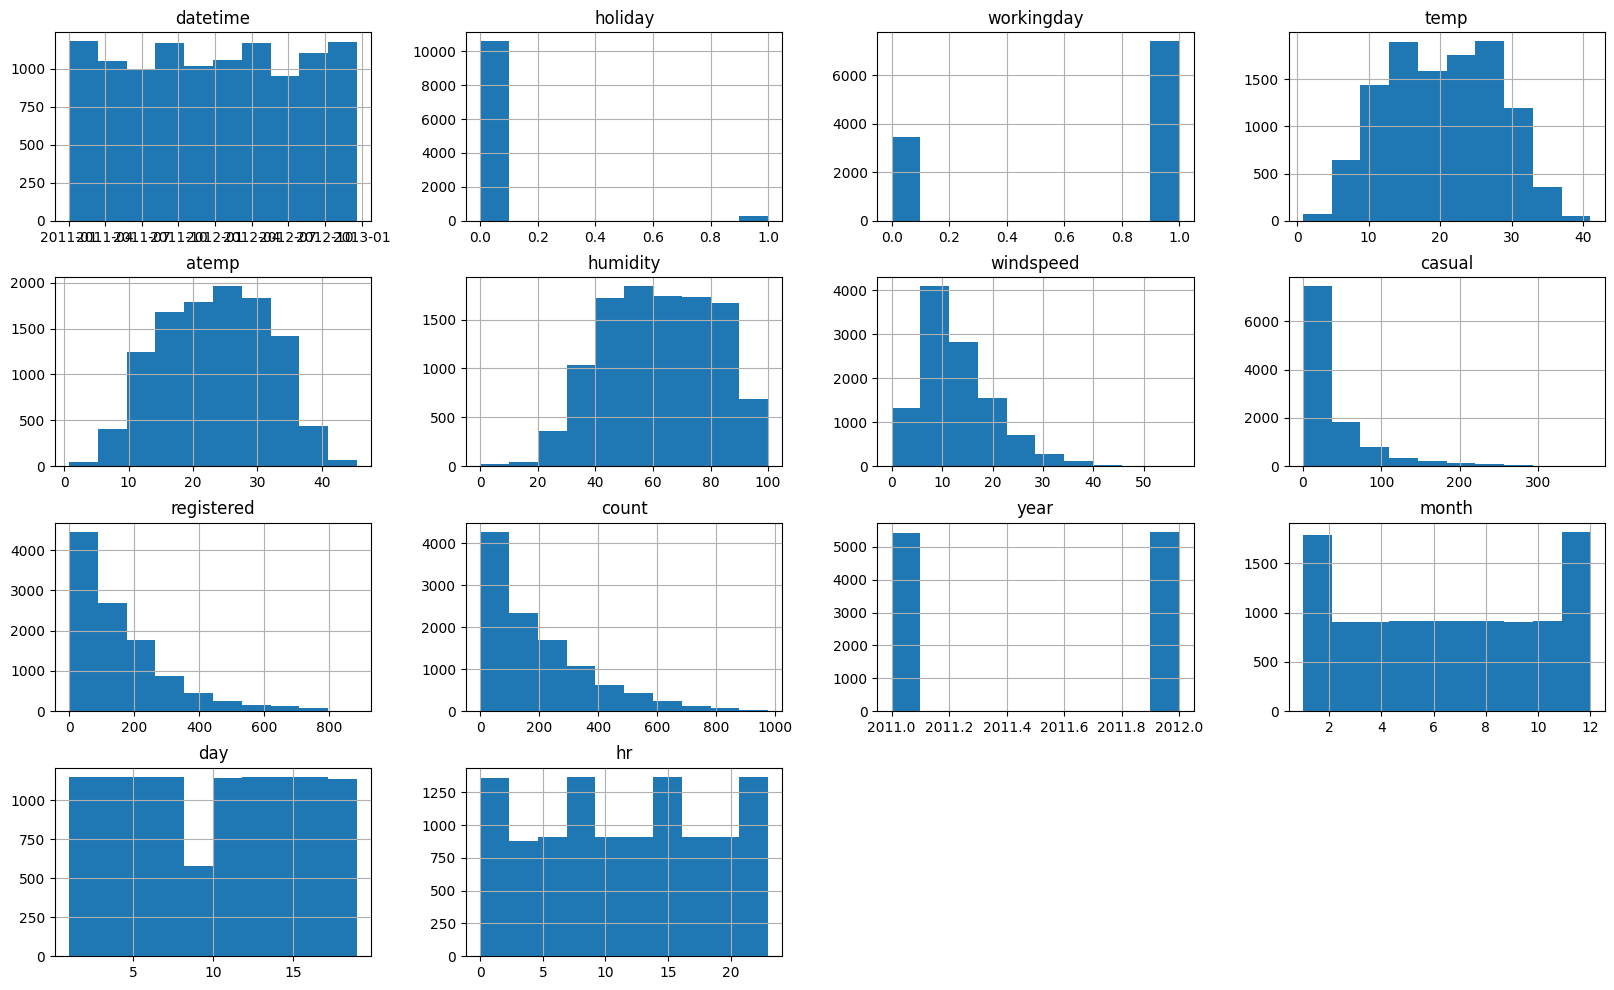

In [39]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(20,12));

### Compare Model Performance

## Revised model run

In [41]:
model_new_features = TabularPredictor(label="count",
                             problem_type="regression",
                             eval_metric="root_mean_squared_error",
                             learner_kwargs={"ignored_columns": ["casual", "registered"]}).fit(
    train_data=train,
    time_limit=600,
    presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20240427_190013"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240427_190013/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 251 seconds

In [42]:
model_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.431865  root_mean_squared_error      21.236317  325.039881                0.000994           0.036688            3       True         13
1          LightGBM_BAG_L2  -30.654621  root_mean_squared_error      19.287173  240.874233                0.282609          21.706307            2       True         10
2          CatBoost_BAG_L2  -31.210198  root_mean_squared_error      19.182684  250.694214                0.178120          31.526288            2       True         12
3        LightGBMXT_BAG_L2  -31.241275  root_mean_squared_error      20.092537  244.109135                1.087973          24.941209            2       True          9
4   RandomForestMSE_BAG_L2  -31.700936  root_mean_squared_error      19.686620  246.829389   

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.453884062670745,
  'LightGBM_BAG_L1': -33.91733862651761,
  'RandomForestMSE_BAG_L1': -39.85678250698512,
  'CatBoost_BAG_L1': -34.918289106825995,
  'ExtraTree

In [43]:
predicted_new_features = model_new_features.predict(test)

In [44]:
predicted_new_features

0        16.256182
1        10.449386
2         9.664494
3         8.576830
4         7.274655
           ...    
6488    279.791473
6489    205.545715
6490    154.339722
6491    106.835602
6492     65.453873
Name: count, Length: 6493, dtype: float32

In [45]:
# Remember to set all negative values to zero
predicted_new_features[predicted_new_features < 0]

Series([], Name: count, dtype: float32)

In [46]:
submission_new_features = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])

In [47]:
# Same submitting predictions
submission_new_features["count"] = predicted_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [48]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "additional features"

100% 188k/188k [00:01<00:00, 149kB/s] 
Successfully submitted to Bike Sharing Demand

In [50]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description              status    publicScore  privateScore  
---------------------------  -------------------  -----------------------  --------  -----------  ------------  
submission_new_features.csv  2024-04-27 19:12:57  additional features      complete  0.61478      0.61478       
submission.csv               2024-04-27 18:58:16  first raw submission     complete  1.802        1.802         
submission.csv               2024-04-27 18:57:33  my first raw submission  complete  1.802        1.802         


#### New Score of `0.61478`

## Hyper parameter optimization


1.   We can adjust the higher-level parameters of AutoGluon.
2.   We can fine-tune the individual model hyperparameters within AutoGluon.

1.   Specifically, we'll focus on optimizing the hyperparameters of the models themselves within AutoGluon. This involves using the hyperparameter and hyperparameter_tune_kwargs arguments to refine the model settings for improved performance.






In [55]:
import autogluon.common as ag

nn_options = {
    'num_epochs': 15,
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),
}

gbm_options = {
    'num_boost_round': 50,
    'num_leaves': ag.space.Int(lower=25, upper=50, default=30),  # number of leaves in trees (integer hyperparameter)
}

knn_options = {
'weights': 'distance',
'ag_args': {'name_suffix': 'Unif'},
}


hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                   'KNN': knn_options
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained

time_limit = 10*60  # train various models for ~2 min
num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

In [56]:
model_new_hpo = TabularPredictor(label='count',
                                     eval_metric="root_mean_squared_error",
                                     learner_kwargs={"ignored_columns":["casual", "registered"]}).fit(
    train, time_limit=600,
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
    presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20240427_191906"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240427_191906/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 77 seconds 

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.08%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.07%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.07%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.07%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	-54.0273	 = Validation score   (-root_mean_squared_error)
	20.56s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T2 ...
	-47.3553	 = Validation score   (-root_mean_squared_error)
	20.42s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T3 ...
	-55.1061	 = Validation score   (-root_mean_squared_error)
	27.62s	 = Training   run

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.10%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.09%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.09%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.09%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.11%)
Fitted model: LightGBM_BAG_L2/T1 ...
	-39.6588	 = Validation score   (-root_mean_squared_error)
	19.68s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T2 ...
	-36.0893	 = Validation score   (-root_mean_squared_error)
	22.12s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_

In [57]:
model_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      LightGBM_BAG_L2/T2  -36.089320  root_mean_squared_error       0.001463  112.205215                0.000143          22.122886            2       True          8
1     WeightedEnsemble_L3  -36.089320  root_mean_squared_error       0.002230  112.223691                0.000767           0.018476            3       True         12
2      LightGBM_BAG_L2/T1  -39.658772  root_mean_squared_error       0.001449  109.760388                0.000129          19.678059            2       True          7
3      LightGBM_BAG_L2/T3  -40.057259  root_mean_squared_error       0.001442  112.394259                0.000123          22.311931            2       True          9
4     WeightedEnsemble_L2  -47.200999  root_mean_squared_error       0.001040   20.560467         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T5': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -84.12506123181602,
  'LightGBM_BAG_L1/T1': -54.02728389198074,
  'LightGBM_BAG_L1/T2': -47.35533067255835,
  'LightGBM_BAG_L1/T3': -55.10613574908548,
  'LightGBM_BAG_L1/T4': -147.7350701138136,
  'WeightedEnsemble_L2': -47.20099884678958,
  'LightGBM_BAG_L2/T1': -39.65877224598596,
  'LightGBM_BAG_L2/T2': -36.

In [58]:
# Remember to set all negative values to zero
predictions_new_hpo = model_new_hpo.predict(test)
predictions_new_hpo

0        24.805580
1        23.924664
2        24.107849
3        23.863029
4        22.813801
           ...    
6488    281.160248
6489    213.916824
6490    181.072266
6491    152.450607
6492    121.675301
Name: count, Length: 6493, dtype: float32

In [59]:
predictions_new_hpo[predictions_new_hpo < 0]

Series([], Name: count, dtype: float32)

In [60]:
submission_new_hpo = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])

In [61]:
# submitting predictions again
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [62]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:01<00:00, 156kB/s]
Successfully submitted to Bike Sharing Demand

In [63]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-04-27 19:24:00  new features with hyperparameters  complete  0.85704      0.85704       
submission_new_features.csv  2024-04-27 19:12:57  additional features                complete  0.61478      0.61478       
submission.csv               2024-04-27 18:58:16  first raw submission               complete  1.802        1.802         


#### New Score of `0.85704`

##  Report

### Identify which model from AutoGluon performed the best from fitting the train data to the Tabular Predictor.

The best performing model based on the root mean squared error (RMSE) evaluation metric is the WeightedEnsemble_L3. It achieved a validation score of approximately -53.08. This model is a weighted ensemble of various base models and represents the final model in the ensemble hierarchy. It combines predictions from multiple models to make more accurate predictions than any single model alone.

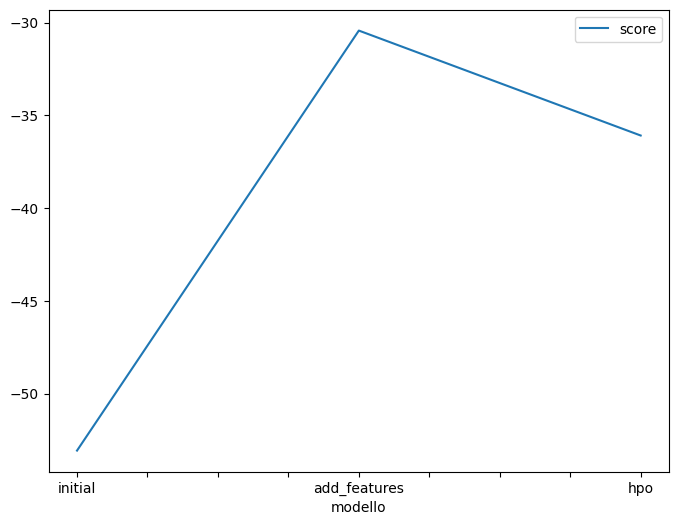

In [70]:
# Taking the top model score from each training run and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "modello": ["initial", "add_features", "hpo"],
        "score": [predictor.leaderboard()['score_val'][0], model_new_features.leaderboard()['score_val'][0], model_new_hpo.leaderboard()['score_val'][0]]
    }
).plot(x="modello", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

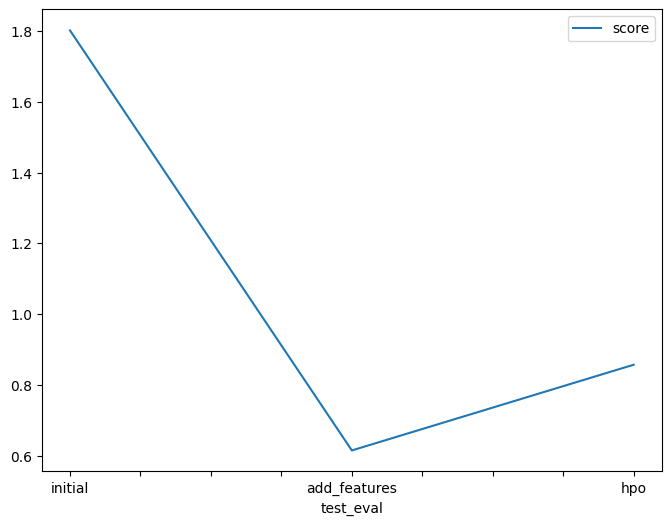

In [72]:
# We can directly see an increase in score after refining features and optimizing hyperparameters
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.802, 0.61478, 0.85704]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

a table outlining each hyperparameter uses along with the kaggle score received from each iteration.

In [73]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ['time_limit=600', 'presets=best_quality', 'nn_options.num_epochs=15'],
    "hpo2": ['time_limit=600', 'presets=best_quality', 'gbm_options.num_boos_round=50'],
    "hpo3": ['time_limit=600', 'presets=best_quality', 'knn_options.weights=distance'],
    "score": [1.802, 0.61478, 0.85704]
}).set_index('model')

,hpo1,hpo2,hpo3,score
model,,,,
initial,time_limit=600,time_limit=600,time_limit=600,1.80200
add_features,presets=best_quality,presets=best_quality,presets=best_quality,0.61478
hpo,nn_options.num_epochs=15,gbm_options.num_boos_round=50,knn_options.weights=distance,0.85704
